## Data collection

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('1688640705_hr_comma_sep.xlsx')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data quality check

### Check for missing value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

__Observation:__
* **Above results shows that there is no missing value in Dataframe**

### Checking for Duplictae rows

In [6]:
duplicate = df[df.duplicated()]

In [7]:
duplicate

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


__Observation:__
* **It is indicating there are duplicate rows. So, we need to remove the duplicates** 

In [8]:
# removing duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [10]:
duplicate_check = df[df.duplicated()]
duplicate_check

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary


__Observation:__
* Total rows reduced to 11991 from 14999, so total of 3008 no. of duplicate rows has been removed

### Checking for imbalanced data depending on target variable

In [11]:
df[['left']].value_counts()

left
0       10000
1        1991
Name: count, dtype: int64

__Observation:__
* **Above result indicates that we need to apply SMOTE to this imbalanced dataframe** 

# Understand what factors contributed most to employee turnover by EDA

### Heatmap of correlation matrix

In [12]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=[np.number])
numeric_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1
11996,0.74,0.95,5,266,10,0,0,1
11997,0.85,0.54,3,185,10,0,0,1
11998,0.33,0.65,3,172,10,0,0,1


In [13]:
# creating correlation matrix
corr_matrix = numeric_data.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


In [14]:
# Importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt

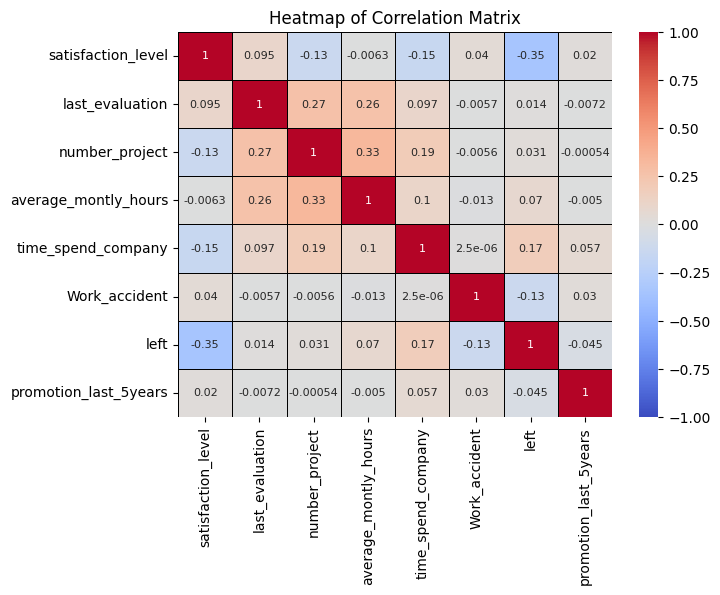

In [15]:
plt.figure(figsize=(7, 5))
sns.heatmap(
    corr_matrix, #creates the heatmap.
    annot=True, #adds the correlation values to each cell.
    cmap='coolwarm', #sets the color map.
    vmin=-1, #define the range of values for the color scale
    vmax=1, #define the range of values for the color scale
    annot_kws={"size": 8}, 
    linewidths=0.5,
    linecolor='black'
)
plt.title('Heatmap of Correlation Matrix')
plt.show()

### Distplot of few features

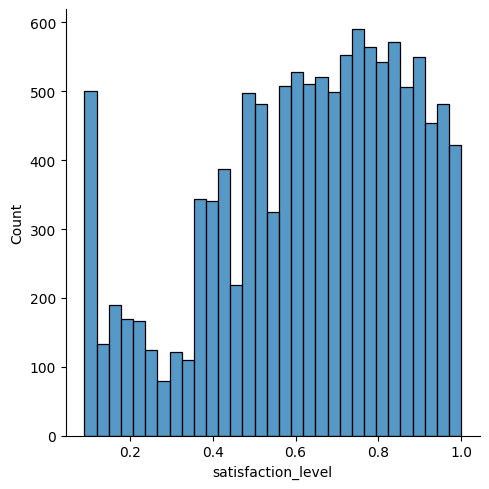

In [16]:
# distplot of Employee Satisfaction
sns.displot(df['satisfaction_level']) # display the skewness of data

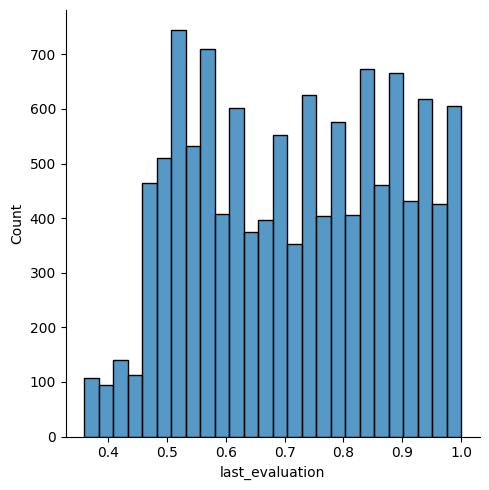

In [17]:
# distplot of Employee Evaluation
sns.displot(df['last_evaluation']) # display the skewness of data

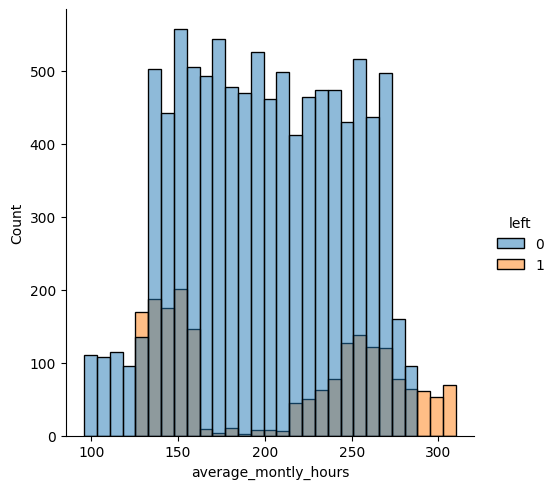

In [18]:
# distplot of Average Monthly Hours
sns.displot(data=df, x='average_montly_hours', hue='left') # display the skewness of data

### Bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.

In [19]:
left_count = df.groupby(['left','number_project']).size().reset_index(name='Count')
left_count

,left,number_project,Count
0,0,2,725
1,0,3,3482
2,0,4,3448
3,0,5,1890
4,0,6,455
5,1,2,857
6,1,3,38
7,1,4,237
8,1,5,343
9,1,6,371


<Axes: xlabel='number_project', ylabel='Count'>

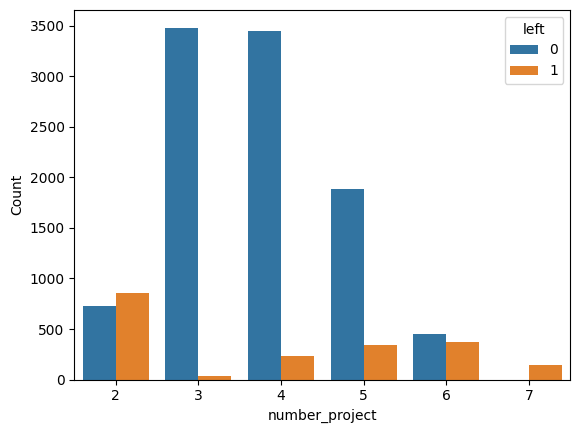

In [20]:
sns.barplot(x=left_count['number_project'],y=left_count['Count'],hue=left_count['left'])

__Observation:__
* Correlation matrix : most negetivly corrleated feature is satisfaction level but correlation matrix is not accurate without continuos variable. So, we can't conclude correlation accurately from this hit map. There is also catagorical data for which correlation matrix won't work.
* Dist plot : If dist plot is not following normal distribution we could not apply logistic regression rather we need to use models like dicissiontree, SVM etc. we could not use it for regression. In this problem, as it is a classification problem we could not use logistic regression.
* Bar plot : Employees having 2 projects are more inteded to leave the company. And after that  as no. of project increases the ratio between employee who left and who stayed are decreasing.

# Clustering of Employees who left based on their satisfaction and evaluation

### Choose columns satisfaction_level, last_evaluation and left

In [21]:
df_kmeans = df[df['left']==0][['satisfaction_level','last_evaluation']]
df_kmeans

,satisfaction_level,last_evaluation
2000,0.58,0.74
2001,0.82,0.67
2002,0.45,0.69
2003,0.78,0.82
2004,0.49,0.60
...,...,...
11995,0.90,0.55
11996,0.74,0.95
11997,0.85,0.54
11998,0.33,0.65


In [22]:
#df_kmeans_left = df_kmeans[df_kmeans['left']==0][['satisfaction_level','last_evaluation']]
#df_kmeans_left

In [23]:
df_kmeans_left = df_kmeans.iloc[:,:].values
df_kmeans_left

array([[0.58, 0.74],
       [0.82, 0.67],
       [0.45, 0.69],
       ...,
       [0.85, 0.54],
       [0.33, 0.65],
       [0.5 , 0.73]])

* To visualize the cluster we need two dimetional data or we could use PCA to reduce the dimention

In [24]:
from sklearn.cluster import KMeans

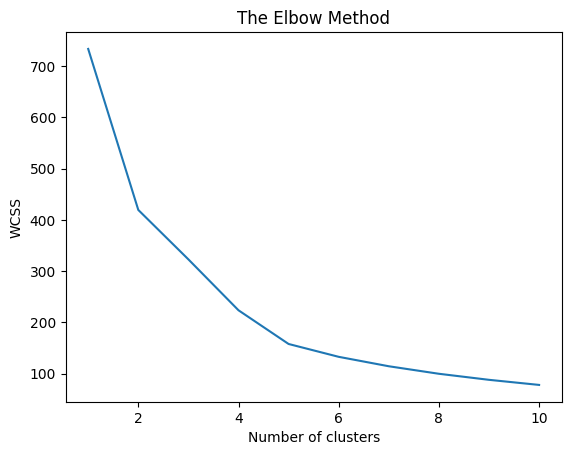

In [25]:
# Elbow method to get the possible k values
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    model.fit(df_kmeans_left)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* **We are getting 3 elbow point at 2,4 and 5. but as in question they have specified to create 3 clusters we will use k=3**

In [26]:
model_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = model.fit_predict(df_kmeans_left)

In [27]:
y_kmeans

array([7, 1, 7, ..., 4, 2, 7])

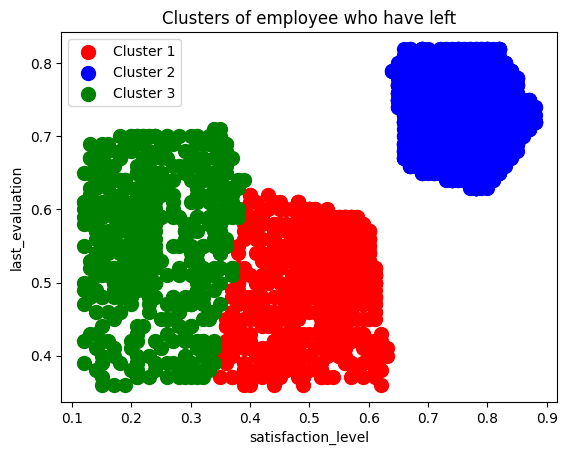

In [28]:
#plotting the cluster
plt.scatter(df_kmeans_left[y_kmeans == 0, 0], df_kmeans_left[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df_kmeans_left[y_kmeans == 1, 0], df_kmeans_left[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_kmeans_left[y_kmeans == 2, 0], df_kmeans_left[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of employee who have left')
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.legend()
plt.show()

__Observation__:
* Employees with high satisfection level and last evaluation done more than 6 months ago have less probability to leave the comany

# Handle the left Class Imbalance using SMOTE technique

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
# Label encoding for the 'salary' column as there is some order
label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])

In [31]:
df['salary']

0        1
1        2
2        2
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    1
Name: salary, Length: 11991, dtype: int32

In [32]:
#applying OHE on sales as there is no order in the catagorical values
df_new = pd.get_dummies(df, columns= ['sales'],drop_first= True, dtype='int64')
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [33]:
df_new.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical'],
      dtype='object')

In [34]:
df_new['salary'].unique()

array([1, 2, 0])

In [35]:
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [36]:
# creating target varibale and dependant features
feature = df_new.drop('left', axis = 1)
target = df_new[['left']]

In [37]:
# applying train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, train_size=0.8, random_state = 123, stratify=target)

In [38]:
print ("Shape of X_train", X_train.shape)
print ("Shape of X_test", X_test.shape)
print ("Shape of y_train", y_train.shape)
print ("Shape of y_test", y_test.shape)

Shape of X_train (9592, 17)
Shape of X_test (2399, 17)
Shape of y_train (9592, 1)
Shape of y_test (2399, 1)


In [39]:
print ("Value counts of y_train", y_train.value_counts())
print ("Value counts of y_test", y_test.value_counts())

Value counts of y_train left
0       7999
1       1593
Name: count, dtype: int64
Value counts of y_test left
0       2001
1        398
Name: count, dtype: int64


In [40]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
9492,0.44,0.56,3,123,3,0,0,2,0,1,0,0,0,0,0,0,0
11555,0.98,0.44,4,154,6,1,0,2,0,0,0,0,0,0,1,0,0
11301,0.76,0.99,3,133,4,0,0,1,0,0,0,0,0,0,1,0,0
5578,0.47,0.55,2,156,2,0,0,2,0,0,0,1,0,0,0,0,0
6241,0.84,0.68,4,151,2,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10564,0.74,0.89,5,182,2,0,0,1,0,0,1,0,0,0,0,0,0
9614,0.76,0.48,5,173,3,0,0,0,0,1,0,0,0,0,0,0,0
3685,0.68,0.88,5,201,3,0,0,2,0,0,0,0,0,0,1,0,0
11042,0.97,0.89,4,208,2,1,0,1,0,0,0,0,0,0,0,0,1


In [41]:
#Applying SMOTE to balance the data
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [42]:
#verifying the balanced data
y_train_smote.value_counts()

left
0       7999
1       7999
Name: count, dtype: int64

In [43]:
X_train_smote.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
count,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000,15998.000000
mean,0.554442,0.719671,3.800225,203.569759,3.539817,0.094387,0.010751,1.305226,0.036942,0.035442,0.039567,0.022003,0.042818,0.042255,0.253344,0.127016,0.160833
std,0.265894,0.178955,1.422752,54.194477,1.187654,0.292375,0.103133,0.581248,0.188626,0.184900,0.194947,0.146697,0.202453,0.201177,0.434940,0.333001,0.367388
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.388733,0.540000,2.000000,152.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.560000,0.740000,4.000000,205.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.790000,0.885445,5.000000,252.000000,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_smote_std = scaler.fit_transform(X_train_smote)
X_test_std = scaler.transform(X_test)



# converting again in dataframe from numpy.ndarray
X_train_smote_std = pd.DataFrame(X_train_smote_std, columns = X_train_smote.columns, index = X_train_smote.index)
X_train_smote_std.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,-0.430418,-0.892271,-0.562466,-1.486725,-0.454538,-0.322838,-0.104251,1.195351,-0.195855,5.216816,-0.202972,-0.149993,-0.211502,-0.210047,-0.582499,-0.38144,-0.437787
1,1.600530,-1.562852,0.140419,-0.914693,2.071528,3.097532,-0.104251,1.195351,-0.195855,-0.191688,-0.202972,-0.149993,-0.211502,-0.210047,1.716741,-0.38144,-0.437787
2,0.773107,1.510642,-0.562466,-1.302198,0.387484,-0.322838,-0.104251,-0.525137,-0.195855,-0.191688,-0.202972,-0.149993,-0.211502,-0.210047,1.716741,-0.38144,-0.437787
3,-0.317588,-0.948153,-1.265351,-0.877788,-1.296560,-0.322838,-0.104251,1.195351,-0.195855,-0.191688,-0.202972,6.666998,-0.211502,-0.210047,-0.582499,-0.38144,-0.437787
4,1.073988,-0.221691,0.140419,-0.970051,-1.296560,-0.322838,-0.104251,-0.525137,-0.195855,-0.191688,-0.202972,-0.149993,-0.211502,-0.210047,-0.582499,-0.38144,2.284216


In [45]:
# converting again in dataframe from numpy.ndarray
X_test_std = pd.DataFrame(X_test_std, columns = X_test.columns, index = X_test.index)
X_test_std.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
8578,0.998768,1.287116,1.546189,-0.231945,2.071528,-0.322838,-0.104251,1.195351,-0.195855,5.216816,-0.202972,-0.149993,-0.211502,-0.210047,-0.582499,-0.381440,-0.437787
5756,-1.408282,0.784180,0.843304,1.170456,0.387484,-0.322838,-0.104251,1.195351,-0.195855,5.216816,-0.202972,-0.149993,-0.211502,-0.210047,-0.582499,-0.381440,-0.437787
3994,0.284175,1.454761,0.140419,-0.803977,-1.296560,-0.322838,-0.104251,1.195351,-0.195855,-0.191688,-0.202972,-0.149993,-0.211502,-0.210047,1.716741,-0.381440,-0.437787
1784,-0.468028,-1.171680,-1.265351,-1.006956,-0.454538,3.097532,-0.104251,1.195351,-0.195855,5.216816,-0.202972,-0.149993,-0.211502,-0.210047,-0.582499,-0.381440,-0.437787
10508,-0.167147,1.454761,0.140419,0.764497,-0.454538,-0.322838,-0.104251,1.195351,-0.195855,-0.191688,-0.202972,-0.149993,-0.211502,-0.210047,-0.582499,2.621647,-0.437787


# Perform 5-Fold cross-validation model training and evaluate performance

### Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report

* **Though it is indicated by the above data analysis that Logistic regression is not best suited for this data but as per the question we are implementing that**

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# creating base model
my_log_model1 = LogisticRegression()

# np.ravel(y_train) to avoid the warning "A column-vector y was passed when a 1d array was expected"
# that ravel function is used to flaten the the column vector to 1d array
my_log_model1.fit(X_train_smote_std, np.ravel(y_train_smote))

LogisticRegression()

In [48]:
y_pred_log = my_log_model1.predict(X_test_std)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
print ("Report for base Logistic regression model ::")
print ("========================================================")
accuracy_log_base = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy_log_base)

cm_log_base = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:")
print(cm_log_base)

report_log_base = classification_report(y_test, y_pred_log, zero_division=1)
print("Classification Report:")
print(report_log_base)

Report for base Logistic regression model ::
Accuracy: 0.7586494372655272
Confusion Matrix:
[[1560  441]
 [ 138  260]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      2001
           1       0.37      0.65      0.47       398

    accuracy                           0.76      2399
   macro avg       0.64      0.72      0.66      2399
weighted avg       0.83      0.76      0.78      2399



* As employee leave the office is more important, we need more correct 1 value than 0, thus Recall is important here

In [51]:
# plotting the classification report

# Generate classification report as dictionary
report_log_base = classification_report(y_test, y_pred_log, output_dict=True)

# Convert report to DataFrame for better visualization
report_log_base_df = pd.DataFrame(report_log_base).transpose()

report_log_base_df

,precision,recall,f1-score,support
0,0.918728,0.779610,0.843471,2001.000000
1,0.370899,0.653266,0.473157,398.000000
accuracy,0.758649,0.758649,0.758649,0.758649
macro avg,0.644813,0.716438,0.658314,2399.000000
weighted avg,0.827842,0.758649,0.782035,2399.000000


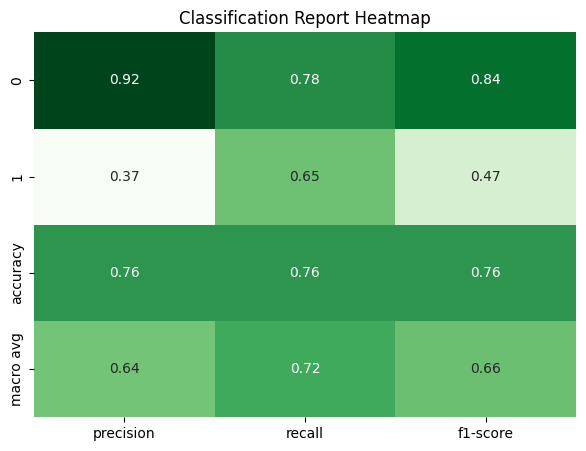

In [52]:
# Plot the classification report
#plt.figure(figsize=(10, 6))
plt.figure(figsize=(7, 5))
sns.heatmap(report_log_base_df.iloc[:-1, :-1], annot=True, cmap='Greens', cbar=False)
plt.title('Classification Report Heatmap')
plt.show()

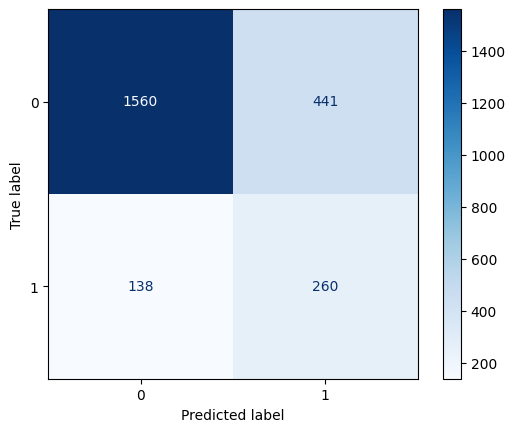

In [53]:
# plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

#confusion_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log_base, display_labels=my_log_model1.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()

In [54]:
# Applying GridsearchCV - gridsearch is for hyperparameter tuning and cv is for cross validation
# for only cross validation we could use below code

# from sklearn import model_selection
# kfold = model_selection.KFold(n_splits=10)
# in the model we could use cv=kfold



In [55]:
#validating results with GridsearchCV
from sklearn.model_selection import GridSearchCV

mlr = LogisticRegression()
param_grid_log = {  'penalty' : ['l1', 'l2'],
                'C' : np.logspace(-4, 4, 20),
                'solver' : ['liblinear'],
                'max_iter' : [100, 1000,2500, 5000]
              }

grid_log = GridSearchCV(mlr, param_grid_log, refit = True, verbose = 1, cv=5, n_jobs=-1)

grid_search_log=grid_log.fit(X_train_smote_std, np.ravel(y_train_smote))

Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [56]:
print(grid_search_log.best_params_)

{'C': 0.012742749857031334, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [57]:
y_pred_log_cv = grid_log.predict(X_test_std)

In [58]:
print ("Report for Logistic regression model after hyper parameter tuning and cross validation ::")
print ("========================================================")
accuracy_log_base_cv = accuracy_score(y_test, y_pred_log_cv)
print("Accuracy:", accuracy_log_base_cv)

cm_log_base_cv = confusion_matrix(y_test, y_pred_log_cv)
print("Confusion Matrix:")
print(cm_log_base_cv)

report_log_base_cv = classification_report(y_test, y_pred_log_cv, zero_division=1)
print("Classification Report:")
print(report_log_base_cv)

Report for Logistic regression model after hyper parameter tuning and cross validation ::
Accuracy: 0.7590662776156732
Confusion Matrix:
[[1551  450]
 [ 128  270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      2001
           1       0.38      0.68      0.48       398

    accuracy                           0.76      2399
   macro avg       0.65      0.73      0.66      2399
weighted avg       0.83      0.76      0.78      2399



In [59]:
# plotting the classification report after hypermarameter tuning

# Generate classification report as dictionary
report_log_base_cv = classification_report(y_test, y_pred_log_cv, output_dict=True)

# Convert report to DataFrame for better visualization
report_log_base_cv_df = pd.DataFrame(report_log_base_cv).transpose()

report_log_base_cv_df

,precision,recall,f1-score,support
0,0.923764,0.775112,0.842935,2001.000000
1,0.375000,0.678392,0.483005,398.000000
accuracy,0.759066,0.759066,0.759066,0.759066
macro avg,0.649382,0.726752,0.662970,2399.000000
weighted avg,0.832723,0.759066,0.783222,2399.000000


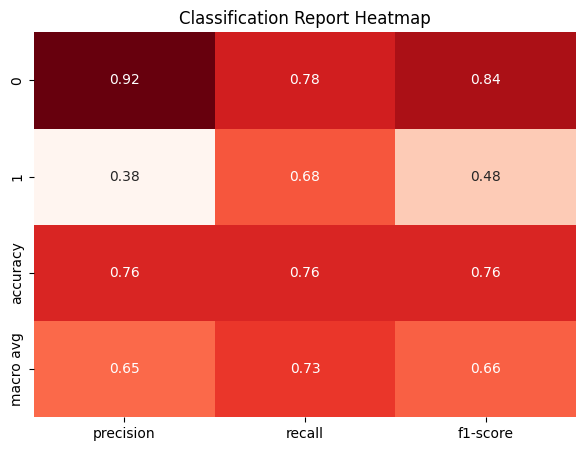

In [60]:
# Plot the classification report
#plt.figure(figsize=(10, 6))
plt.figure(figsize=(7, 5))
sns.heatmap(report_log_base_cv_df.iloc[:-1, :-1], annot=True, cmap='Reds', cbar=False)
plt.title('Classification Report Heatmap')
plt.show()

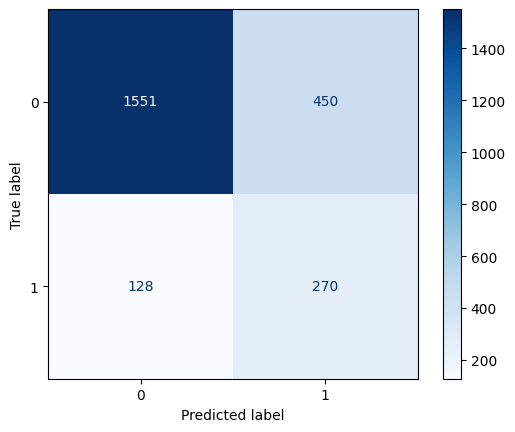

In [61]:
# plotting the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cm_log_base_cv, display_labels=grid_log.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()

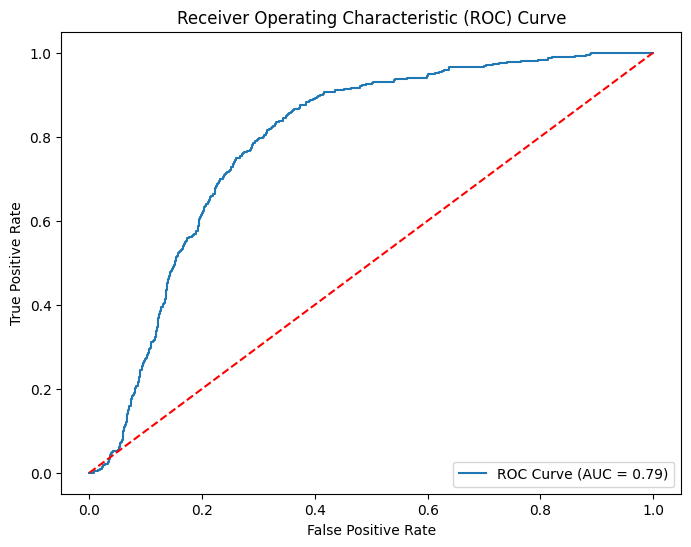

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
proba_log = grid_log.predict_proba(X_test_std)
proba_class_log = proba_log[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class_log)
roc_auc_log = roc_auc_score(y_test, proba_class_log)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

### RandomForest Classifier

In [72]:
# RandomForest classifer model
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

In [75]:

# creating base model
my_rf_model1 = RandomForestClassifier()

# np.ravel(y_train) to avoid the warning "A column-vector y was passed when a 1d array was expected"
# that ravel function is used to flaten the the column vector to 1d array
my_rf_model1.fit(X_train_smote_std, np.ravel(y_train_smote))
y_pred_rf = my_rf_model1.predict(X_test_std)

In [88]:
# Define the cross-validation strategy with a specific random state
cv = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

# Apply 5-fold cross-validation
cv_scores = model_selection.cross_val_score(my_rf_model1, X_train_smote_std, np.ravel(y_train_smote), cv=cv)

# Print the cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print("Standard deviation of cross-validation scores:", np.std(cv_scores))

Cross-validation scores: [0.9796875  0.975      0.9796875  0.97467959 0.97592998]
Mean cross-validation score: 0.9769969130978431
Standard deviation of cross-validation scores: 0.0022349284754265815


In [79]:
print ("Report for base Random Forest model ::")
print ("========================================================")
accuracy_rf_base_cv = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf_base_cv)

cm_rf_base_cv = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf_base_cv)

report_rf_base_cv = classification_report(y_test, y_pred_rf, zero_division=1)
print("Classification Report:")
print(report_rf_base_cv)

Report for base Random Forest model ::
Accuracy: 0.9716548561900792
Confusion Matrix:
[[1969   32]
 [  36  362]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.92      0.91      0.91       398

    accuracy                           0.97      2399
   macro avg       0.95      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



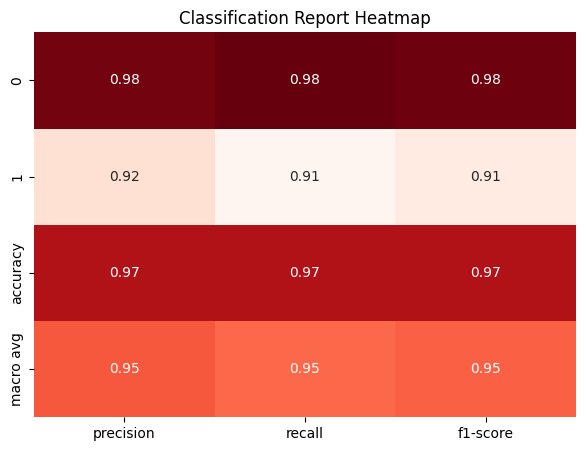

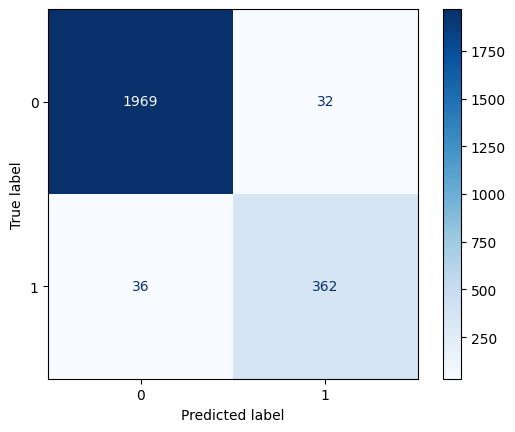

In [80]:
# plotting the classification report with base model

# Generate classification report as dictionary
report_rf_base = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert report to DataFrame for better visualization
report_rf_base_df = pd.DataFrame(report_rf_base).transpose()

# Plot the classification report
#plt.figure(figsize=(10, 6))
plt.figure(figsize=(7, 5))
sns.heatmap(report_rf_base_df.iloc[:-1, :-1], annot=True, cmap='Reds', cbar=False)
plt.title('Classification Report Heatmap')
plt.show()


disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_base_cv, display_labels=grid_log.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()

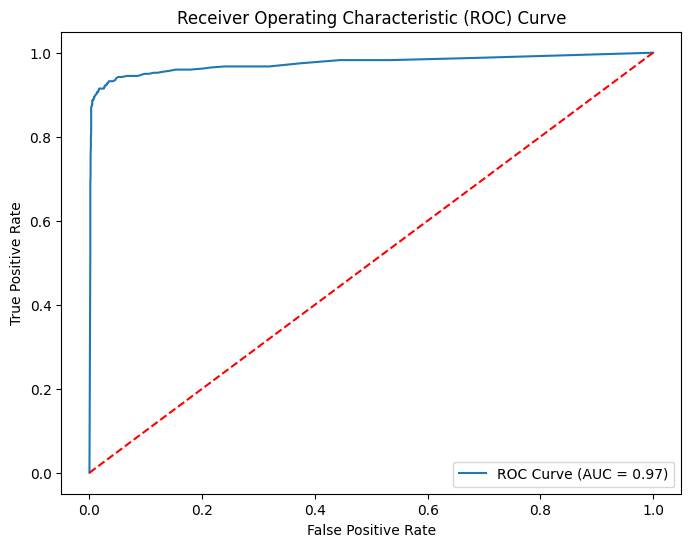

In [81]:
from sklearn.metrics import roc_curve, roc_auc_score
proba_rf = my_rf_model1.predict_proba(X_test_std)
proba_class_rf = proba_rf[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class_rf)
roc_auc_log = roc_auc_score(y_test, proba_class_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

### Graidant Boosting classifier

In [83]:
# RandomForest classifer model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

In [84]:
# creating base model
my_gb_model1 = GradientBoostingClassifier()

# np.ravel(y_train) to avoid the warning "A column-vector y was passed when a 1d array was expected"
# that ravel function is used to flaten the the column vector to 1d array
my_gb_model1.fit(X_train_smote_std, np.ravel(y_train_smote))
y_pred_gb = my_gb_model1.predict(X_test_std)

In [87]:
# Define the cross-validation strategy with a specific random state
cv_gb = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

# Apply 5-fold cross-validation
cv_scores_gb = model_selection.cross_val_score(my_gb_model1, X_train_smote_std, np.ravel(y_train_smote), cv=cv)

# Print the cross-validation results
print("Cross-validation scores:", cv_scores_gb)
print("Mean cross-validation score:", np.mean(cv_scores_gb))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_gb))

Cross-validation scores: [0.9625     0.9596875  0.9659375  0.9596749  0.95717412]
Mean cross-validation score: 0.9609948030634573
Standard deviation of cross-validation scores: 0.0029914779992818085


In [86]:
#validating results with GridsearchCV
from sklearn.model_selection import GridSearchCV


param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10]
}

grid_gb = GridSearchCV(my_gb_model1, param_grid_gb, refit = True, verbose = 1, cv=5, n_jobs=-1)

grid_search_gb=grid_gb.fit(X_train_smote_std, np.ravel(y_train_smote))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [89]:
print(grid_search_gb.best_params_)

{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}


In [90]:
y_pred_gb_cv = grid_gb.predict(X_test_std)

In [91]:
print ("Report for Gradiant boostin model after applying GridsearchCV ::")
print ("========================================================")
accuracy_gb = accuracy_score(y_test, y_pred_gb_cv)
print("Accuracy:", accuracy_gb)

cm_gb = confusion_matrix(y_test, y_pred_gb_cv)
print("Confusion Matrix:")
print(cm_gb)

report_gb = classification_report(y_test, y_pred_gb_cv, zero_division=1)
print("Classification Report:")
print(report_gb)

Report for Gradiant boostin model after applying GridsearchCV ::
Accuracy: 0.9729053772405168
Confusion Matrix:
[[1969   32]
 [  33  365]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.92      0.92      0.92       398

    accuracy                           0.97      2399
   macro avg       0.95      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



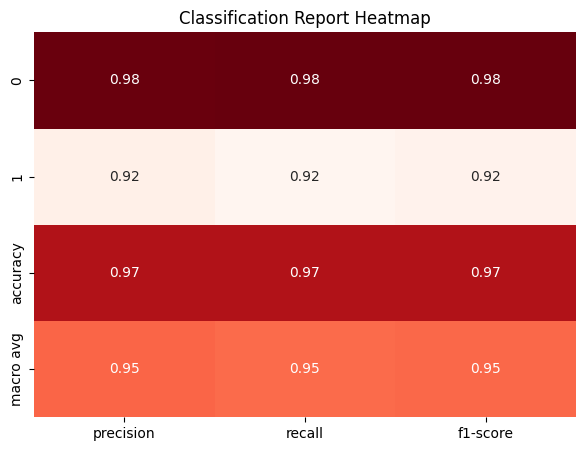

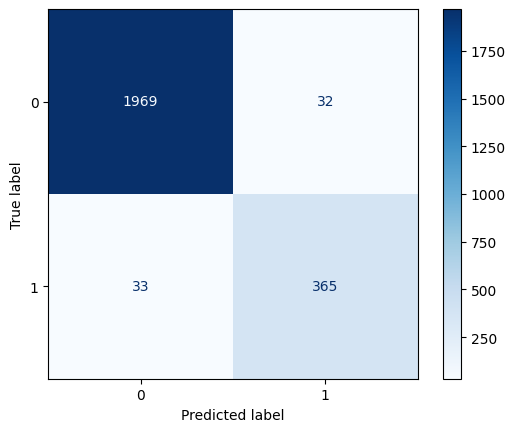

In [93]:
# plotting the classification report with base model

# Generate classification report as dictionary
report_gb_cv = classification_report(y_test, y_pred_gb_cv, output_dict=True)

# Convert report to DataFrame for better visualization
report_gb_cv_df = pd.DataFrame(report_gb_cv).transpose()

# Plot the classification report
#plt.figure(figsize=(10, 6))
plt.figure(figsize=(7, 5))
sns.heatmap(report_gb_cv_df.iloc[:-1, :-1], annot=True, cmap='Reds', cbar=False)
plt.title('Classification Report Heatmap')
plt.show()


disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=grid_log.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.show()

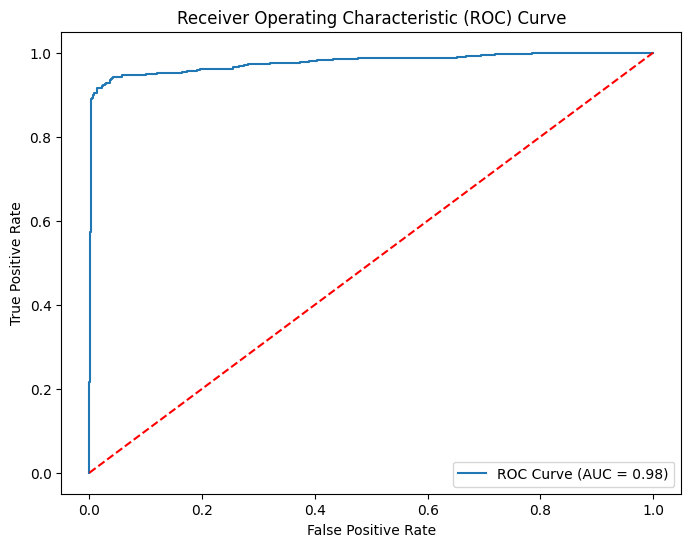

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score
proba_gb = grid_gb.predict_proba(X_test_std)
proba_class_gb = proba_gb[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, proba_class_gb)
roc_auc_gb = roc_auc_score(y_test, proba_class_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [95]:
proba_gb

array([[9.97190758e-01, 2.80924248e-03],
       [9.95865227e-01, 4.13477310e-03],
       [9.99792077e-01, 2.07923475e-04],
       ...,
       [9.99955900e-01, 4.41001340e-05],
       [9.99450174e-01, 5.49825787e-04],
       [9.99819506e-01, 1.80494418e-04]])

In [98]:
# Convert probabilities to human-readable percentages
proba_percentages = proba_gb * 100
proba_percentages = np.round(proba_percentages, 2)
proba_percentages

array([[9.972e+01, 2.800e-01],
       [9.959e+01, 4.100e-01],
       [9.998e+01, 2.000e-02],
       ...,
       [1.000e+02, 0.000e+00],
       [9.995e+01, 5.000e-02],
       [9.998e+01, 2.000e-02]])

In [104]:
thresholds = [20, 60, 90]
results = {'safe': [], 'low_risk': [], 'med_risk': [], 'high_risk': []}

for i, (_, class_1_prob) in enumerate(proba_percentages):
    if class_1_prob < thresholds[0]:
        results['safe'].append(i)
    elif (class_1_prob < thresholds[1] and class_1_prob > thresholds[0]):
        results['low_risk'].append(i)
    elif (class_1_prob < thresholds[2] and class_1_prob > thresholds[1]):
        results['med_risk'].append(i)
    elif (class_1_prob < thresholds[2] and class_1_prob > thresholds[1]):
        results['high_risk'].append(i)

In [105]:
data_dict = {'count': [len(results['safe']), len(results['low_risk']), len(results['med_risk']), len(results['high_risk'])],
             'type': ['safe', 'low_risk', 'med_risk', 'high_risk']}

df_dict = pd.DataFrame(data_dict)
print(df_dict)


   count       type
0   1971       safe
1     36   low_risk
2     27   med_risk
3      0  high_risk


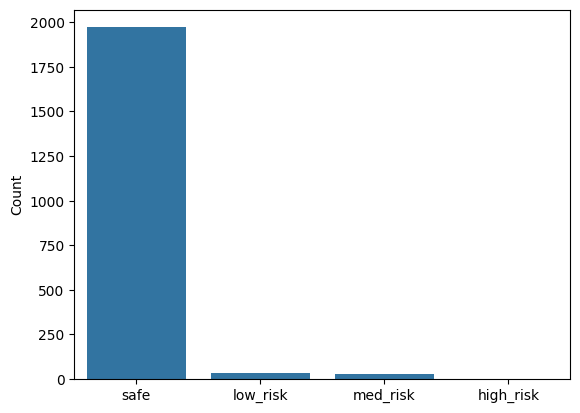

In [107]:
sns.barplot(x=df_dict['type'],y=df_dict['count'])
plt.ylabel('Count')
plt.xlabel('')
plt.show()